## Exploring the data

sentiment
neutral     5079
positive    3219
negative    2378
Name: count, dtype: int64
sentiment
neutral     5364
positive    3652
negative    1660
Name: count, dtype: int64
sentiment
neutral     2597
positive    1850
negative    1077
Name: count, dtype: int64


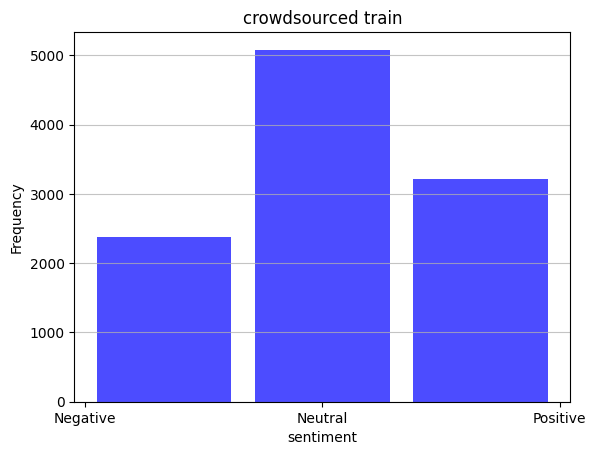

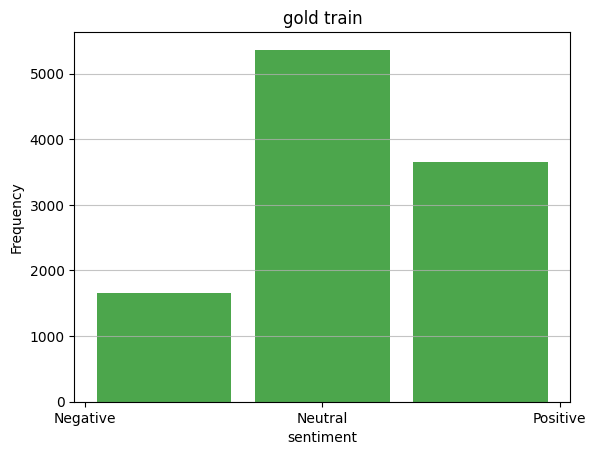

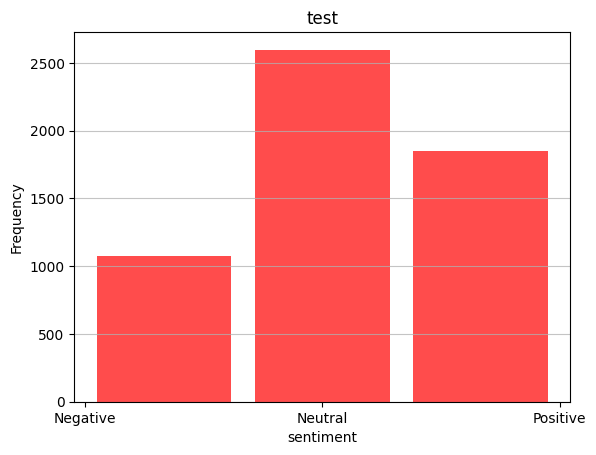

In [21]:
import pandas as pd

## convert tab separated files to csv

df1 = pd.read_csv('crowdsourced_train.csv', sep='\t')
df2 = pd.read_csv('gold_train.csv', sep='\t')
df3 = pd.read_csv('test.csv', sep='\t')




# 
df1_y = df1['sentiment']
for i in range(len(df1_y)):
    if "u" in df1_y[i]:
        df1_y[i] = "neutral"
    elif "g" in df1_y[i] or "Nedative" in df1_y[i]:
        df1_y[i] = "negative"
    elif "p" in df1_y[i] or "o" in df1_y[i] or "P" in df1_y[i]:
        df1_y[i] = "positive"
    


print(df1_y.value_counts())
df2_y = df2['sentiment']
print(df2_y.value_counts())
df3_y = df3['sentiment']
print(df3_y.value_counts())


import matplotlib.pyplot as plt

label_order = ['Negative', 'Neutral', 'Positive']
label_map = {'neutral': 1, 'negative': 0, 'positive': 2}
map_1 = df1_y.map(label_map)
map_2 = df2_y.map(label_map)
map_3 = df3_y.map(label_map)

plt.hist(map_1, bins=3, color='blue', alpha=0.7, rwidth=0.85)
plt.title('crowdsourced train')
plt.xlabel('sentiment')
plt.ylabel('Frequency')
plt.xticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'])
plt.grid(axis='y', alpha=0.75)
plt.show()



plt.hist(map_2, bins=3, color='green', alpha=0.7, rwidth=0.85)
plt.title('gold train')
plt.xlabel('sentiment')
plt.ylabel('Frequency')
plt.xticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'])
plt.grid(axis='y', alpha=0.75)
plt.show()



plt.hist(map_3, bins=3, color='red', alpha=0.7, rwidth=0.85)
plt.title('test')
plt.xlabel('sentiment')
plt.ylabel('Frequency')
plt.xticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'])
plt.grid(axis='y', alpha=0.75)
plt.show()


In [22]:
## Agreement Score between crowdsourced_train and gold_train
n_agree = 0

for i in range(df1_y.size):
    if df1_y[i] == df2_y[i]:
        n_agree += 1
        

p0 = n_agree/df1_y.size

print(p0)

0.6549269389284376


[[2292, 864, 63], [1174, 3504, 401], [186, 996, 1196]]


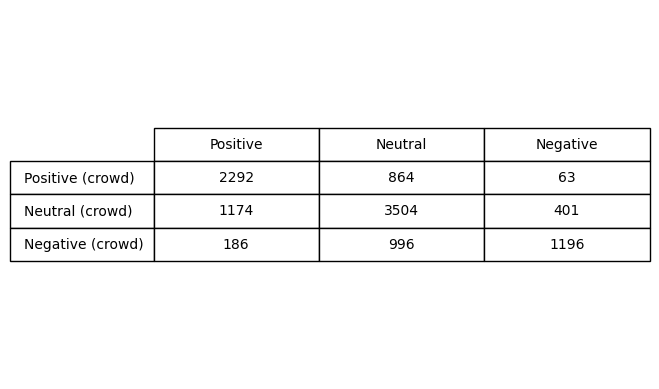

In [23]:
n_pos_pos = 0
n_neg_pos = 0
n_neu_pos = 0

n_pos_neu = 0
n_neg_neu = 0
n_neu_neu = 0

n_pos_neg = 0
n_neg_neg = 0
n_neu_neg = 0
for i in range(df1_y.size):
    if df1_y[i] == 'positive' and df2_y[i] == 'positive':
        n_pos_pos += 1
    if df1_y[i] == 'negative' and df2_y[i] == 'positive':
        n_neg_pos += 1
    if df1_y[i] == 'neutral' and df2_y[i] == 'positive':
        n_neu_pos += 1

    if df1_y[i] == 'positive' and df2_y[i] == 'neutral':
        n_pos_neu += 1
    if df1_y[i] == 'negative' and df2_y[i] == 'neutral':
        n_neg_neu += 1
    if df1_y[i] == 'neutral' and df2_y[i] == 'neutral':
        n_neu_neu += 1

    if df1_y[i] == 'positive' and df2_y[i] == 'negative':
        n_pos_neg += 1
    if df1_y[i] == 'negative' and df2_y[i] == 'negative':
        n_neg_neg += 1
    if df1_y[i] == 'neutral' and df2_y[i] == 'negative':
        n_neu_neg += 1

# Sample 3x3 data (e.g., multiplication table)
data = [ [n_pos_pos,n_pos_neu,n_pos_neg], [n_neu_pos,n_neu_neu,n_neu_neg],[n_neg_pos,n_neg_neu,n_neg_neg] ]

print(data)

row_labels = ['Positive (crowd)', 'Neutral (crowd)', 'Negative (crowd)']
col_labels = ['Positive', 'Neutral', 'Negative']
# Create figure and axis
fig, ax = plt.subplots()
ax.axis('off')  # Hide the axes

# Create table
table = ax.table(cellText=data, loc='center', cellLoc='center', rowLabels=row_labels, colLabels=col_labels)

# Adjust table appearance
table.scale(1, 2)  # Optional: scale the table for better visibility

# Show the table
plt.show()


## Testing different models and feature selection methods

#### TF-IDF

In [24]:
# test run with tfidf
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
import numpy as np
import pandas as pd
train = pd.read_csv('gold_train.csv', sep='\t')
train_y = train['sentiment']
train_x = train['text']

# clean up the crowdsourced data
for i in range(len(train_y)):
    if "u" in train_y[i]:
        train_y[i] = "neutral"
    elif "g" in train_y[i] or "Nedative" in train_y[i]:
        train_y[i] = "negative"
    elif "p" in train_y[i] or "o" in train_y[i] or "P" in train_y[i]:
        train_y[i] = "positive"

test = pd.read_csv('test.csv', sep='\t')
test_y = test['sentiment']
test_x = test['text']


# to make the data more uninform another step in preprocessing is removing stop words, punctuation and lowercasing the text
train_x = train_x.str.lower()

# remove punctuation
train_x = train_x.str.replace(r'[^\w\s]', '', regex=True)


train_x = train_x.str.replace(r'\d+', '', regex=True)

# remove extra spaces
train_x = train_x.str.replace(r'\s+', ' ', regex=True)

# remove leading and trailing spaces
train_x = train_x.str.strip()


#remove stop words
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
train_x = train_x.apply(lambda x: ' '.join([word for word in x.split() if word not in ENGLISH_STOP_WORDS]))

print("train_x: ", train_x.head())


# build the pipelines for the models
svmpipe = make_pipeline(TfidfVectorizer(ngram_range=(1,2), max_features=4000), svm.SVC(kernel='linear', probability=True))
nbpipe = make_pipeline(TfidfVectorizer(ngram_range=(1,2), max_features=4000), MultinomialNB())
rfpipe = make_pipeline(TfidfVectorizer(ngram_range=(1,2), max_features=4000), RandomForestClassifier())

# time to use grid search to find the best parameters for the models 
from sklearn.model_selection import GridSearchCV, StratifiedKFold
# imported for multi threading
from joblib import parallel_backend


# skipped because it takes too long to run
# # grid search for svm
# svcparameters = {
#     'svc__C': [0.1, 1, 10],
#     'svc__gamma': [0.01, 0.1, 1]}
# print("grid search for SVM")
# with parallel_backend('threading', n_jobs=-1):
#     svmgrid = GridSearchCV(
#         svmpipe, 
#         svcparameters, 
#         cv=2,  # for speed
#         scoring='f1_weighted', 
#         refit=True
#     )
#     svmgrid.fit(train_x, train_y)

# print("optimal parameters for SVM: ", svmgrid.best_params_)
# print("score for SVM: ", svmgrid.best_score_)
# print("best estimator: ", svmgrid.best_estimator_)



# grid search for naive bayes
nbparam = {
    'multinomialnb__alpha': [0.1, 0.5, 1.0],
    'multinomialnb__fit_prior': [True, False],
    'multinomialnb__class_prior': [None, [0.5, 0.3, 0.2], [0.2, 0.3, 0.5]],
}

print("grid search for Naive Bayes")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

with parallel_backend('threading', n_jobs=-1):
    nbgrid = GridSearchCV(nbpipe, nbparam, cv=cv, scoring='f1_macro', refit=True, verbose=1)
    nbgrid.fit(train_x, train_y)

print("parameters Naive Bayes: ", nbgrid.best_params_)
print("score for Naive Bayes: ", nbgrid.best_score_)
print("optimaö estimator for Naive Bayes: ", nbgrid.best_estimator_)

rfparam = {
    'randomforestclassifier__n_estimators': [10, 50, 100, 200],
    'randomforestclassifier__max_depth': [1, 10, 20],
    'randomforestclassifier__max_features': [ 'sqrt', 'log2'],
}
print("grid search for Random Forest")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

with parallel_backend('threading', n_jobs=-1):
    rfgrid = GridSearchCV(rfpipe, rfparam, cv=cv, scoring='f1_macro', refit=True, verbose=1)
    rfgrid.fit(train_x, train_y)
print("parameters Random Forest: ", rfgrid.best_params_)
print("score for Random Forest: ", rfgrid.best_score_)
print("optimaö estimator for Random Forest: ", rfgrid.best_estimator_)




# test the models on the test set with the best parameters
print("testing the models on the test set")
# predsvm = svmgrid.predict(test_x)

prednb = nbgrid.predict(test_x)

predrf = rfgrid.predict(test_x)



print("class rep nb" )
print(classification_report(test_y, prednb, target_names=['positive', 'neutral', 'negative']))

print("class rep rf" )
print(classification_report(test_y, predrf, target_names=['positive', 'neutral', 'negative']))










train_x:  0    theres misconception islam rn showing muslims ...
1    mr_rondeau try iron maiden friday way bell rin...
2    going fantasticfour tomorrow half expecting bo...
3    cfelan hey hey just checkng kokorissa sam smit...
4    does just drunk watch twilight best friend mon...
Name: text, dtype: object
grid search for Naive Bayes
Fitting 5 folds for each of 18 candidates, totalling 90 fits
parameters Naive Bayes:  {'multinomialnb__alpha': 1.0, 'multinomialnb__class_prior': None, 'multinomialnb__fit_prior': False}
score for Naive Bayes:  0.5633696524485526
optimaö estimator for Naive Bayes:  Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=4000, ngram_range=(1, 2))),
                ('multinomialnb', MultinomialNB(fit_prior=False))])
grid search for Random Forest
Fitting 5 folds for each of 24 candidates, totalling 120 fits
parameters Random Forest:  {'randomforestclassifier__max_depth': 20, 'randomforestclassifier__max_features': 'sqrt', 'randomf

### Count Vectorizer

In [25]:
# test run with count vectorizer
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
# from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
import numpy as np
import pandas as pd
train = pd.read_csv('gold_train.csv', sep='\t')
train_y = train['sentiment']
train_x = train['text']

# clean up the crowdsourced data
for i in range(len(train_y)):
    if "u" in train_y[i]:
        train_y[i] = "neutral"
    elif "g" in train_y[i] or "Nedative" in train_y[i]:
        train_y[i] = "negative"
    elif "p" in train_y[i] or "o" in train_y[i] or "P" in train_y[i]:
        train_y[i] = "positive"

test = pd.read_csv('test.csv', sep='\t')
test_y = test['sentiment']
test_x = test['text']


# to make the data more uninform another step in preprocessing is removing stop words, punctuation and lowercasing the text
train_x = train_x.str.lower()

# remove punctuation
train_x = train_x.str.replace(r'[^\w\s]', '', regex=True)


train_x = train_x.str.replace(r'\d+', '', regex=True)

# remove extra spaces
train_x = train_x.str.replace(r'\s+', ' ', regex=True)

# remove leading and trailing spaces
train_x = train_x.str.strip()


#remove stop words
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
train_x = train_x.apply(lambda x: ' '.join([word for word in x.split() if word not in ENGLISH_STOP_WORDS]))

print("train_x: ", train_x.head())


# build the pipelines for the models
svmpipe = make_pipeline(CountVectorizer(ngram_range=(1,2), max_features=4000), svm.SVC(kernel='linear', probability=True))
nbpipe = make_pipeline(CountVectorizer(ngram_range=(1,2), max_features=4000), MultinomialNB())
rfpipe = make_pipeline(CountVectorizer(ngram_range=(1,2), max_features=4000), RandomForestClassifier())

# time to use grid search to find the best parameters for the models 
from sklearn.model_selection import GridSearchCV, StratifiedKFold
# imported for multi threading
from joblib import parallel_backend


# skipped because it takes too long to run
# # grid search for svm
# svcparameters = {
#     'svc__C': [0.1, 1, 10],
#     'svc__gamma': [0.01, 0.1, 1]}
# print("grid search for SVM")
# with parallel_backend('threading', n_jobs=-1):
#     svmgrid = GridSearchCV(
#         svmpipe, 
#         svcparameters, 
#         cv=2,  # for speed
#         scoring='f1_weighted', 
#         refit=True
#     )
#     svmgrid.fit(train_x, train_y)

# print("optimal parameters for SVM: ", svmgrid.best_params_)
# print("score for SVM: ", svmgrid.best_score_)
# print("best estimator: ", svmgrid.best_estimator_)



# grid search for naive bayes
nbparam = {
    'multinomialnb__alpha': [0.1, 0.5, 1.0],
    'multinomialnb__fit_prior': [True, False],
    'multinomialnb__class_prior': [None, [0.5, 0.3, 0.2], [0.2, 0.3, 0.5]],
}

print("grid search for Naive Bayes")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

with parallel_backend('threading', n_jobs=-1):
    nbgrid = GridSearchCV(nbpipe, nbparam, cv=cv, scoring='f1_macro', refit=True, verbose=1)
    nbgrid.fit(train_x, train_y)

print("parameters Naive Bayes: ", nbgrid.best_params_)
print("score for Naive Bayes: ", nbgrid.best_score_)
print("optimaö estimator for Naive Bayes: ", nbgrid.best_estimator_)

rfparam = {
    'randomforestclassifier__n_estimators': [10, 50, 100, 200],
    'randomforestclassifier__max_depth': [1, 10, 20],
    'randomforestclassifier__max_features': [ 'sqrt', 'log2'],
}
print("grid search for Random Forest")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

with parallel_backend('threading', n_jobs=-1):
    rfgrid = GridSearchCV(rfpipe, rfparam, cv=cv, scoring='f1_macro', refit=True, verbose=1)
    rfgrid.fit(train_x, train_y)
print("parameters Random Forest: ", rfgrid.best_params_)
print("score for Random Forest: ", rfgrid.best_score_)
print("optimaö estimator for Random Forest: ", rfgrid.best_estimator_)




# test the models on the test set with the best parameters
print("testing the models on the test set")
# predsvm = svmgrid.predict(test_x)

prednb = nbgrid.predict(test_x)

predrf = rfgrid.predict(test_x)



print("class rep nb" )
print(classification_report(test_y, prednb, target_names=['positive', 'neutral', 'negative']))

print("class rep rf" )
print(classification_report(test_y, predrf, target_names=['positive', 'neutral', 'negative']))










train_x:  0    theres misconception islam rn showing muslims ...
1    mr_rondeau try iron maiden friday way bell rin...
2    going fantasticfour tomorrow half expecting bo...
3    cfelan hey hey just checkng kokorissa sam smit...
4    does just drunk watch twilight best friend mon...
Name: text, dtype: object
grid search for Naive Bayes
Fitting 5 folds for each of 18 candidates, totalling 90 fits
parameters Naive Bayes:  {'multinomialnb__alpha': 1.0, 'multinomialnb__class_prior': None, 'multinomialnb__fit_prior': True}
score for Naive Bayes:  0.5741207229199091
optimaö estimator for Naive Bayes:  Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_features=4000, ngram_range=(1, 2))),
                ('multinomialnb', MultinomialNB())])
grid search for Random Forest
Fitting 5 folds for each of 24 candidates, totalling 120 fits
parameters Random Forest:  {'randomforestclassifier__max_depth': 20, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier_

The best model and feature selection combo as Count Vectorizer and Naïve Bayes

## Hyperparameter tuning

In [26]:
# the best model was the naive bayes model with the following parameters and using the count vectorizer
# now we will find the best parameters using a random search.
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import  StratifiedKFold, RandomizedSearchCV
from joblib import parallel_backend
import numpy as np
import pandas as pd
train = pd.read_csv('crowdsourced_train.csv', sep='\t')
train_y = train['sentiment']
train_x = train['text']

# clean up the crowdsourced data
for i in range(len(train_y)):
    if "u" in train_y[i]:
        train_y[i] = "neutral"
    elif "g" in train_y[i] or "Nedative" in train_y[i]:
        train_y[i] = "negative"
    elif "p" in train_y[i] or "o" in train_y[i] or "P" in train_y[i]:
        train_y[i] = "positive"

test = pd.read_csv('test.csv', sep='\t')
test_y = test['sentiment']
test_x = test['text']

def cleanTrain(train_x):
    # to make the data more uninform another step in preprocessing is removing stop words, punctuation and lowercasing the text
    train_x = train_x.str.lower()

    # remove punctuation
    train_x = train_x.str.replace(r'[^\w\s]', '', regex=True)


    train_x = train_x.str.replace(r'\d+', '', regex=True)

    # remove extra spaces
    train_x = train_x.str.replace(r'\s+', ' ', regex=True)

    # remove leading and trailing spaces
    train_x = train_x.str.strip()


    #remove stop words
    from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
    train_x = train_x.apply(lambda x: ' '.join([word for word in x.split() if word not in ENGLISH_STOP_WORDS]))

    # remove extra spaces
    train_x = train_x.str.replace(r'\s+', ' ', regex=True)

    # use stemmer to stem the words
    from nltk.stem import PorterStemmer
    stemmer = PorterStemmer()
    train_x = train_x.apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
    
    return train_x
gridsearch = {
    'multinomialnb__alpha': [0.001,0.01, 0.1,0.3, 0.5, 0.7, 1.0],
    'multinomialnb__fit_prior': [True, False],
    'multinomialnb__class_prior': [None, [0.5, 0.3, 0.2], [0.2, 0.3, 0.5]],
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# build the pipelines for the models
nbpipe = make_pipeline(CountVectorizer(ngram_range=(1,2)), MultinomialNB())




def evalForGold(test_y, test_x, cleanTrain, nbpipe, gridsearch, cv):
    train = pd.read_csv('gold_train.csv', sep='\t')
    train_y = train['sentiment']
    train_x = train['text']
    train_x = cleanTrain(train_x)

    with parallel_backend('threading'):
        nbrandom = RandomizedSearchCV(nbpipe, gridsearch, n_iter=10, cv=cv, scoring='f1_macro', refit=True, verbose=1, random_state=69)
        nbrandom.fit(train_x, train_y)
    print("parameters Naive Bayes gold: ", nbrandom.best_params_)
    nbpipe = make_pipeline(CountVectorizer(ngram_range=(1,10)), MultinomialNB(alpha=nbrandom.best_params_['multinomialnb__alpha'], fit_prior=nbrandom.best_params_['multinomialnb__fit_prior'], class_prior=nbrandom.best_params_['multinomialnb__class_prior']))

    nbpipe.fit(train_x, train_y)
# now evaluate the model on the test set
    evaluateModel(test_y, test_x, nbpipe)

def evaluateModel(test_y, test_x, nbpipe):
    test_x = cleanTrain(test_x)
    preds = nbpipe.predict(test_x)
    print("accuracy nb: ", accuracy_score(test_y, preds))

evalForGold(test_y, test_x, cleanTrain, nbpipe, gridsearch, cv)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
parameters Naive Bayes gold:  {'multinomialnb__fit_prior': False, 'multinomialnb__class_prior': [0.5, 0.3, 0.2], 'multinomialnb__alpha': 0.5}
accuracy nb:  0.7900072411296162


## Retrain and save the model


In [27]:
# Retrain the model using the best params and save it

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import  StratifiedKFold, RandomizedSearchCV
from joblib import parallel_backend
import numpy as np
import pandas as pd

## The actual model

def cleanTrain(train_x):
    # to make the data more uninform another step in preprocessing is removing stop words, punctuation and lowercasing the text
    train_x = train_x.str.lower()

    # remove punctuation
    train_x = train_x.str.replace(r'[^\w\s]', '', regex=True)


    train_x = train_x.str.replace(r'\d+', '', regex=True)

    # remove extra spaces
    train_x = train_x.str.replace(r'\s+', ' ', regex=True)

    # remove leading and trailing spaces
    train_x = train_x.str.strip()


    #remove stop words
    from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
    train_x = train_x.apply(lambda x: ' '.join([word for word in x.split() if word not in ENGLISH_STOP_WORDS]))

    # remove extra spaces
    train_x = train_x.str.replace(r'\s+', ' ', regex=True)

    # use stemmer to stem the words
    from nltk.stem import PorterStemmer
    stemmer = PorterStemmer()
    train_x = train_x.apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
    
    return train_x

## first clean the data and then use the model to predict the sentiment of the text
modelPipeline = make_pipeline(CountVectorizer(ngram_range=(1,10)), MultinomialNB(alpha=0.5, fit_prior=False, class_prior= [0.5, 0.3, 0.2]))

traning = pd.read_csv('crowdsourced_train.csv', sep='\t')

train_y = traning['sentiment']
traning_x = traning['text']
# clean up the crowdsourced data
for i in range(len(train_y)):
    if "u" in train_y[i]:
        train_y[i] = "neutral"
    elif "g" in train_y[i] or "Nedative" in train_y[i]:
        train_y[i] = "negative"
    elif "p" in train_y[i] or "o" in train_y[i] or "P" in train_y[i]:
        train_y[i] = "positive"
traning_x = cleanTrain(traning_x)
# train the model 
model1 = modelPipeline.fit(traning_x, train_y)
# save it 
import joblib
joblib.dump(model1, 'model1.pkl')


traning2 = pd.read_csv('gold_train.csv', sep='\t')
traning2_y = traning2['sentiment']
traning2_x = traning2['text']
traning2_x = cleanTrain(traning2_x)
# train the model
model2 = modelPipeline.fit(traning2_x, traning2_y)
# save it
joblib.dump(model2, 'model2.pkl')




['model2.pkl']

### Make the implementation and evaluate it for the two models

accuracy model1:  0.6071687183200579
f1 score model1:  0.6060766680217704
precision model1:  0.602458334386221
recall model1:  0.5930290975631056
confusion matrix model1: 
 [[ 969  764  117]
 [ 391 1765  441]
 [  77  380  620]]


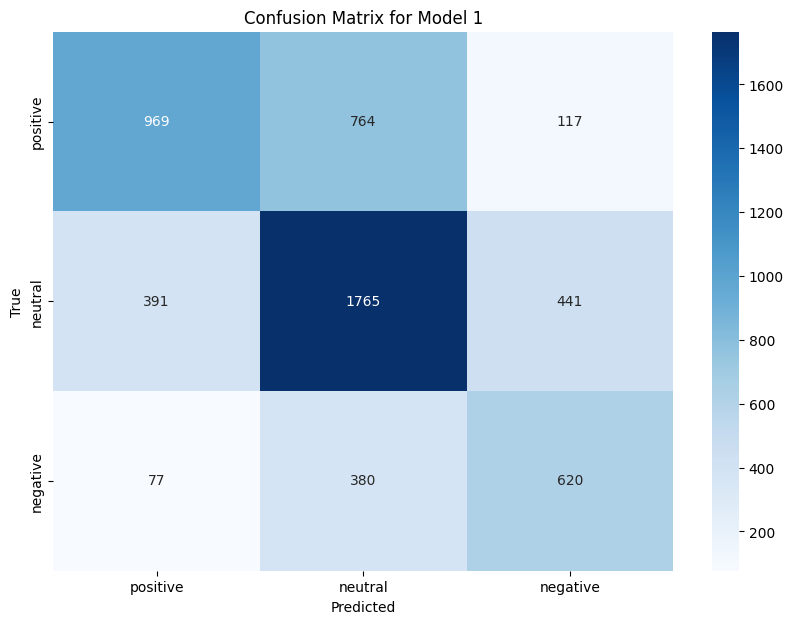

accuracy model2:  0.7900072411296162
f1 score model2:  0.7886892518464007
precision model2:  0.81031766138132
recall model2:  0.7634833689450812
confusion matrix model2: 
 [[1442  390   18]
 [ 294 2212   91]
 [  56  311  710]]


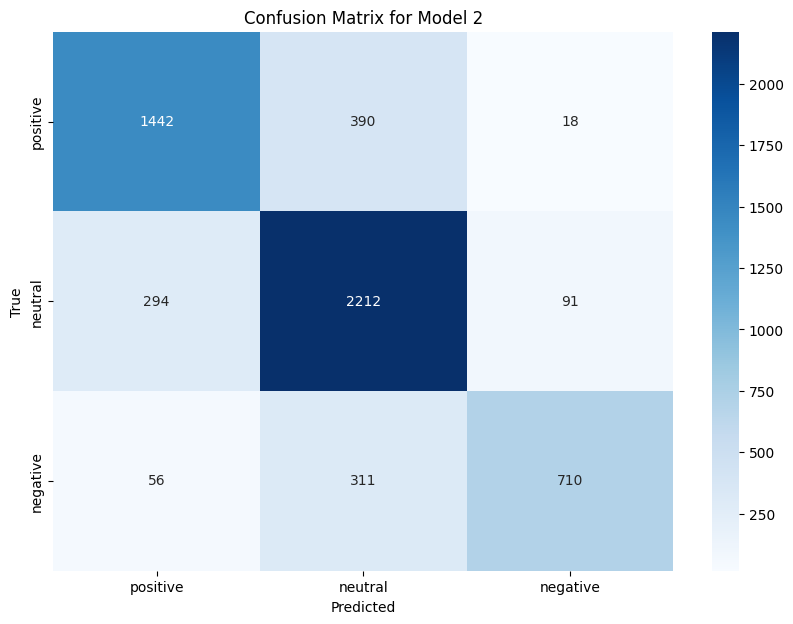

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score, accuracy_score

test = pd.read_csv('test.csv', sep='\t')
test_y = test['sentiment']
test_x = test['text']
test_x = cleanTrain(test_x)



def predictSentiment(text):
    # load the models

    pred1 = model1.predict([text])
    pred2 = model2.predict([text])
    print("prediction crowdsourced: ", pred1[0])
    print("prediction gold: ", pred2[0])
    return pred1[0], pred2[0]

model1 = joblib.load('model1.pkl')
model2 = joblib.load('model2.pkl')
# test the model on the test set and make a confusion matrix
pred1 = model1.predict(test_x)
pred2 = model2.predict(test_x)
print("accuracy model1: ", accuracy_score(test_y, pred1))
print("f1 score model1: ", f1_score(test_y, pred1, average='weighted'))
print("precision model1: ", precision_score(test_y, pred1, average='macro'))
print("recall model1: ", recall_score(test_y, pred1, average='macro'))
print("confusion matrix model1: \n", confusion_matrix(test_y, pred1, labels=['positive', 'neutral', 'negative'])) 
# print the confusion matrix as  a table
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(test_y, pred1, labels=['positive', 'neutral', 'negative']), annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'neutral', 'negative'], yticklabels=['positive', 'neutral', 'negative'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Model 1')
plt.show()


print("accuracy model2: ", accuracy_score(test_y, pred2))
print("f1 score model2: ", f1_score(test_y, pred2, average='weighted'))
print("precision model2: ", precision_score(test_y, pred2, average='macro'))
print("recall model2: ", recall_score(test_y, pred2, average='macro'))
print("confusion matrix model2: \n", confusion_matrix(test_y, pred2, labels=['positive', 'neutral', 'negative']))
# print the confusion matrix as  a table
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(test_y, pred2, labels=['positive', 'neutral', 'negative']), annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'neutral', 'negative'], yticklabels=['positive', 'neutral', 'negative'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Model 2')
plt.show()






# any difference between the two datasets?
the crowdsourced dataset gave a less accurate resut than the gold dataset. This could be due to many factors. One of them being that the crowdsourced data should be considered less reliable as sentiment is hard to classify for many tweets. There might be both context, language and cultural factors that make it hard to classify the sentiment of a tweet. The gold dataset.

# How to run. 
Simply make sure the model files are in the same directory as the notebook and run the function predictSentiment(text)

# How to train the model.
- Install the required packages: scikit-learn, pandas, numpy, joblib
- Make sure the datasets "crowdsourced_train.csv" and "gold_train.csv" are in the same directory as the notebook
- Run the cell with the header "retrain and save the model"
- The models will be saved in the same directory as the notebook with the names "model1.pkl" and "model2.pkl" where model1 is the crowdsourced model and model2 is the gold model.
 

    